In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re, nltk
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

import os, os.path
import shutil
from collections import Counter
import string
import seaborn as sns

from scipy.stats import mode

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Import  data

In [2]:
# import classified_tweets.txt file as a dataframe
trainDF = pd.read_csv( 'income-training.csv', sep=',')
testDF = pd.read_csv('income-testing.csv',sep=',')

### Train data

In [3]:
trainDF.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K


In [4]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 15 columns):
Age              24421 non-null int64
WorkClass        23037 non-null object
FinalWeight      24421 non-null int64
Education        24421 non-null object
EducationLvl     24421 non-null int64
MaritalStatus    24421 non-null object
Occupation       23031 non-null object
Relationship     24421 non-null object
Race             24421 non-null object
Sex              24421 non-null object
CapitalGain      24421 non-null int64
CapitalLoss      24421 non-null int64
HoursPerWeek     24421 non-null int64
NativeCountry    24026 non-null object
IncomeBracket    24421 non-null object
dtypes: int64(6), object(9)
memory usage: 2.8+ MB


In [5]:
trainDF.describe()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek
count,24421.000000,2.442100e+04,24421.000000,24421.000000,24421.00000,24421.000000
mean,38.635273,1.908781e+05,10.100078,1073.734900,90.72581,40.495352
std,13.658678,1.066108e+05,2.579953,7372.250508,410.42682,12.363606
min,17.000000,1.349200e+04,1.000000,0.000000,0.00000,1.000000
25%,28.000000,1.182590e+05,9.000000,0.000000,0.00000,40.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.00000,40.000000
75%,48.000000,2.394090e+05,13.000000,0.000000,0.00000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.00000,99.000000


In [6]:
# change the order of columns 
cols = trainDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
trainDF = trainDF[cols]

### Test data

In [7]:
testDF.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


In [8]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
Age              12211 non-null int64
WorkClass        11523 non-null object
FinalWeight      12211 non-null int64
Education        12211 non-null object
EducationLvl     12211 non-null int64
MaritalStatus    12211 non-null object
Occupation       11521 non-null object
Relationship     12211 non-null object
Race             12211 non-null object
Sex              12211 non-null object
CapitalGain      12211 non-null int64
CapitalLoss      12211 non-null int64
HoursPerWeek     12211 non-null int64
NativeCountry    11986 non-null object
IncomeBracket    12211 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


In [9]:
testDF.describe()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek
count,12211.000000,1.221100e+04,12211.000000,12211.000000,12211.000000,12211.000000
mean,38.856031,1.873615e+05,10.110228,1203.788961,88.256162,40.497994
std,13.705457,1.046019e+05,2.533795,8057.146114,404.810323,12.283195
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.162960e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.769000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.345370e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# change the order of columns 
cols = testDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
testDF = testDF[cols]

# 1.Data Cleaning

## Train Data

In [11]:
trainDF[trainDF['Age'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [12]:
trainDF[trainDF['WorkClass'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
9,<50K,65,NaN,137354,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,20,United-States
29,<50K,18,NaN,118847,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,24,United-States
95,<50K,63,NaN,321403,9th,5,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States
107,<50K,49,NaN,227690,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States
150,>100K,31,NaN,26553,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,25,United-States
154,<50K,17,NaN,297117,11th,7,Never-married,NaN,Own-child,White,Female,0,0,40,United-States
160,<50K,31,NaN,672412,11th,7,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States
184,<50K,63,NaN,166425,Some-college,10,Widowed,NaN,Not-in-family,Black,Female,0,0,24,United-States
192,<50K,20,NaN,133515,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,15,France
271,<50K,18,NaN,152641,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States


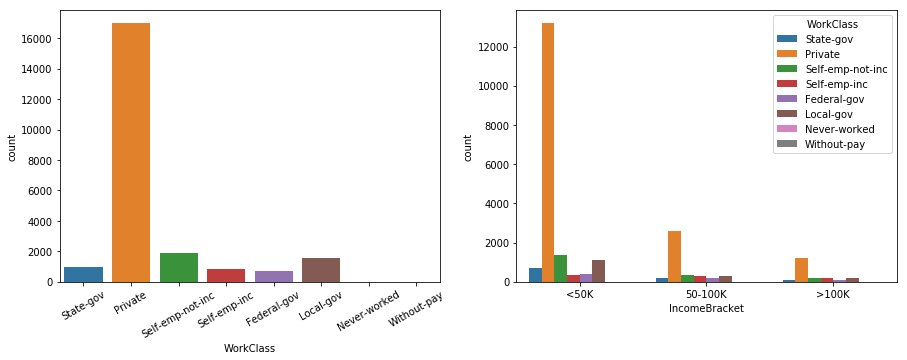

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Plot the number of occurances for each embarked location
g = sns.countplot(x='WorkClass', data=trainDF, ax=ax1,orient = 'v')
g.set_xticklabels(g.get_xticklabels(),rotation=30)

# Plot the number of people that survived by embarked location
sns.countplot(x='IncomeBracket', hue = 'WorkClass', data=trainDF, ax=ax2)

In [14]:
def FindMode (df, arg1, arg2):
    UniqueList = df[arg1].unique()
    mydict = {}
    for i in range(len(UniqueList)):
        FilterDF = df[df[arg1].isin([UniqueList[i]])]
        ModeElement = FilterDF[arg2].mode()[0]
        mydict[UniqueList[i]] = ModeElement
    return mydict

In [15]:
FindMode (trainDF, arg1 = 'IncomeBracket', arg2 = 'WorkClass' )

{'50-100K': 'Private', '<50K': 'Private', '>100K': 'Private'}

In [16]:
trainDF[trainDF['FinalWeight'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [17]:
trainDF[trainDF['Education'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [18]:
trainDF[trainDF['EducationLvl'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [19]:
trainDF[trainDF['MaritalStatus'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [20]:
trainDF[trainDF['Occupation'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
9,<50K,65,NaN,137354,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,20,United-States
29,<50K,18,NaN,118847,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,24,United-States
95,<50K,63,NaN,321403,9th,5,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States
107,<50K,49,NaN,227690,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States
150,>100K,31,NaN,26553,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,25,United-States
154,<50K,17,NaN,297117,11th,7,Never-married,NaN,Own-child,White,Female,0,0,40,United-States
160,<50K,31,NaN,672412,11th,7,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States
184,<50K,63,NaN,166425,Some-college,10,Widowed,NaN,Not-in-family,Black,Female,0,0,24,United-States
192,<50K,20,NaN,133515,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,15,France
271,<50K,18,NaN,152641,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States


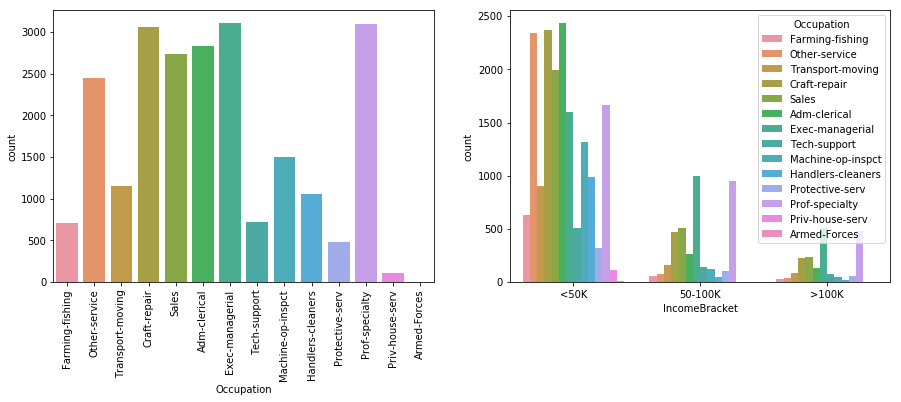

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Plot the number of occurances for each embarked location
g = sns.countplot(x='Occupation', data=trainDF, ax=ax1)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

# Plot the number of people that survived by embarked location
sns.countplot(x='IncomeBracket', hue = 'Occupation', data=trainDF, ax=ax2)

In [22]:
FindMode(trainDF,arg1 = 'IncomeBracket' , arg2= 'Occupation' )

{'50-100K': 'Exec-managerial',
 '<50K': 'Adm-clerical',
 '>100K': 'Exec-managerial'}

In [23]:
trainDF[trainDF['Relationship'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [24]:
trainDF[trainDF['Race'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [25]:
trainDF[trainDF['Sex'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [26]:
trainDF[trainDF['CapitalGain'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [27]:
trainDF[trainDF['CapitalLoss'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [28]:
trainDF[trainDF['HoursPerWeek'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [29]:
trainDF[trainDF['NativeCountry'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
81,50-100K,46,Private,268022,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,NaN
88,<50K,28,Private,226891,Some-college,10,Never-married,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,0,30,NaN
125,<50K,31,Self-emp-not-inc,162551,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,50,NaN
193,<50K,47,Private,263984,Some-college,10,Married-spouse-absent,Exec-managerial,Not-in-family,Black,Male,0,0,40,NaN
282,50-100K,39,Self-emp-inc,116358,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,7688,0,40,NaN
302,<50K,36,Private,177907,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,2176,0,20,NaN
395,<50K,42,Private,153132,Bachelors,13,Divorced,Sales,Unmarried,White,Male,0,0,45,NaN
400,<50K,26,Private,227332,Bachelors,13,Never-married,Transport-moving,Unmarried,Asian-Pac-Islander,Male,0,0,40,NaN
458,<50K,35,Private,77792,HS-grad,9,Married-civ-spouse,Other-service,Wife,Asian-Pac-Islander,Female,0,0,40,NaN
490,<50K,32,Self-emp-not-inc,261056,Bachelors,13,Never-married,Prof-specialty,Own-child,Black,Female,2174,0,60,NaN


In [30]:
FindMode(trainDF, arg1 = 'Race', arg2 = 'NativeCountry')

{'Amer-Indian-Eskimo': 'United-States',
 'Asian-Pac-Islander': 'United-States',
 'Black': 'United-States',
 'Other': 'United-States',
 'White': 'United-States'}

In [31]:
trainDF[trainDF['IncomeBracket'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [32]:
def cleantrainDF(df):
    # Fill WorkClass value
    df = df.set_value(df['WorkClass'].isnull(), 'WorkClass', 'Private')
    # Fill Occupation value
    df = df.set_value(df['Occupation'].isnull() & df['IncomeBracket'].isin(['<50K']), 'Occupation', 'Adm-clerical')
    df = df.set_value(df['Occupation'].isnull() & df['IncomeBracket'].isin(['50-100K']), 'Occupation', 'Exec-managerial')
    df = df.set_value(df['Occupation'].isnull() & df['IncomeBracket'].isin(['>100K']) , 'Occupation', 'Exec-managerial')      
    # Fill NativeCountry value
    df = df.set_value(df['NativeCountry'].isnull(), 'NativeCountry', 'United-States')
    return df

In [33]:
cleantrainDF(trainDF)

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
0,<50K,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
1,<50K,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States
2,50-100K,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
3,<50K,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States
4,<50K,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States
5,<50K,35,Private,261241,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,1741,60,United-States
6,<50K,51,Private,200576,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States
7,<50K,43,Self-emp-inc,175715,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,55,United-States
8,<50K,29,State-gov,188986,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Female,0,1590,64,United-States
9,<50K,65,Private,137354,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,20,United-States


#### Verification

In [34]:
trainDF[trainDF['WorkClass'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [35]:
trainDF[trainDF['Occupation'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [36]:
trainDF[trainDF['NativeCountry'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


## Test Data

In [37]:
testDF[testDF['Age'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [38]:
testDF[testDF['WorkClass'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
31,<50K,48,NaN,136455,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,16,United-States
58,<50K,71,NaN,158437,5th-6th,3,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,Hungary
67,<50K,20,NaN,210029,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States
102,<50K,31,NaN,182191,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,4064,0,30,Canada
148,<50K,41,NaN,152880,HS-grad,9,Divorced,NaN,Not-in-family,Black,Female,0,0,28,United-States
154,<50K,22,NaN,334593,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,United-States
180,<50K,19,NaN,291509,12th,8,Never-married,NaN,Own-child,White,Male,0,0,28,United-States
193,50-100K,51,NaN,69328,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,0,0,50,United-States
204,<50K,45,NaN,319993,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,0,40,Mexico
222,<50K,68,NaN,117542,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,1409,0,15,United-States


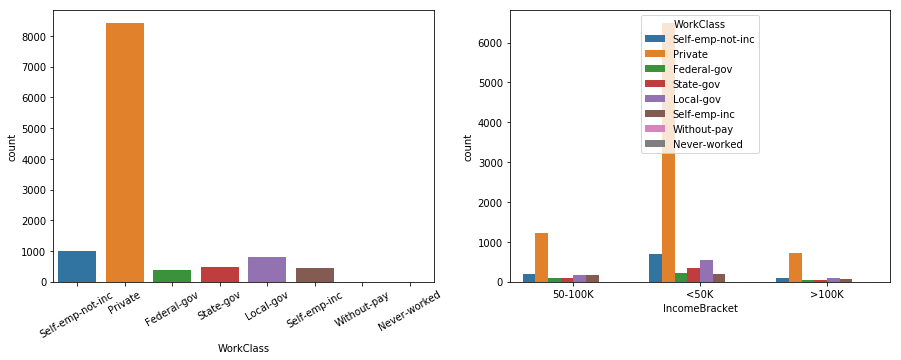

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Plot the number of occurances for each embarked location
g = sns.countplot(x='WorkClass', data=testDF, ax=ax1,orient = 'v')
g.set_xticklabels(g.get_xticklabels(),rotation=30)

# Plot the number of people that survived by embarked location
sns.countplot(x='IncomeBracket', hue = 'WorkClass', data=testDF, ax=ax2)

In [40]:
FindMode (testDF, arg1 = 'IncomeBracket', arg2 = 'WorkClass' )

{'50-100K': 'Private', '<50K': 'Private', '>100K': 'Private'}

In [41]:
testDF[testDF['FinalWeight'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [42]:
testDF[testDF['Education'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [43]:
testDF[testDF['EducationLvl'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [44]:
testDF[testDF['MaritalStatus'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [45]:
testDF[testDF['Occupation'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
31,<50K,48,NaN,136455,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,16,United-States
58,<50K,71,NaN,158437,5th-6th,3,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,Hungary
67,<50K,20,NaN,210029,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States
102,<50K,31,NaN,182191,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,4064,0,30,Canada
148,<50K,41,NaN,152880,HS-grad,9,Divorced,NaN,Not-in-family,Black,Female,0,0,28,United-States
154,<50K,22,NaN,334593,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,United-States
180,<50K,19,NaN,291509,12th,8,Never-married,NaN,Own-child,White,Male,0,0,28,United-States
193,50-100K,51,NaN,69328,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,0,0,50,United-States
204,<50K,45,NaN,319993,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,0,40,Mexico
222,<50K,68,NaN,117542,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,1409,0,15,United-States


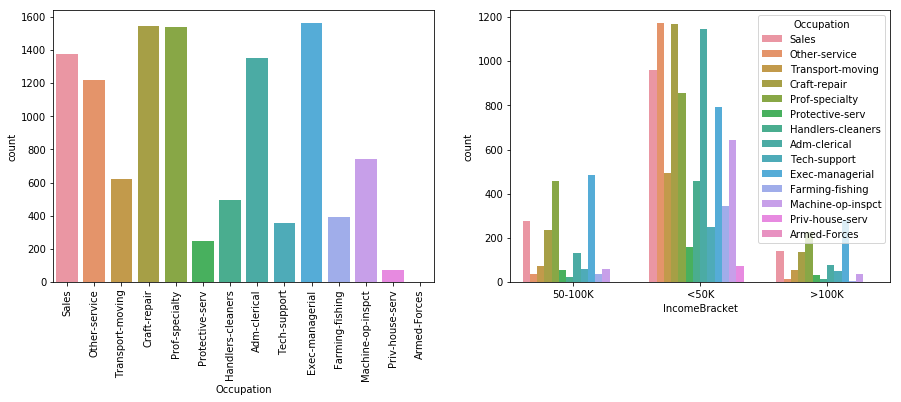

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Plot the number of occurances for each embarked location
g = sns.countplot(x='Occupation', data=testDF, ax=ax1)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

# Plot the number of people that survived by embarked location
sns.countplot(x='IncomeBracket', hue = 'Occupation', data=testDF, ax=ax2)

In [47]:
FindMode(testDF,arg1 = 'IncomeBracket' , arg2= 'Occupation' )

{'50-100K': 'Exec-managerial',
 '<50K': 'Other-service',
 '>100K': 'Exec-managerial'}

In [48]:
testDF[testDF['Race'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [49]:
testDF[testDF['Sex'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [50]:
testDF[testDF['CapitalGain'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [51]:
testDF[testDF['CapitalLoss'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [52]:
testDF[testDF['HoursPerWeek'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [53]:
testDF[testDF['NativeCountry'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
6,>100K,34,Private,303187,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,NaN
91,>100K,38,Private,22245,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,72,NaN
261,>100K,43,Private,183765,Some-college,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,40,NaN
263,<50K,32,Local-gov,190889,Masters,14,Never-married,Prof-specialty,Not-in-family,Other,Female,0,0,40,NaN
307,<50K,30,Federal-gov,54684,Prof-school,15,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,NaN
349,<50K,88,Private,30102,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,1816,50,NaN
406,<50K,25,Private,310864,Bachelors,13,Never-married,Tech-support,Not-in-family,Black,Male,0,0,40,NaN
494,50-100K,35,Private,211494,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,8614,0,40,NaN
523,50-100K,54,Self-emp-inc,223752,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,40,NaN
580,50-100K,49,Private,140826,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,50,NaN


In [54]:
FindMode(testDF, arg1 = 'Race', arg2 = 'NativeCountry')

{'Amer-Indian-Eskimo': 'United-States',
 'Asian-Pac-Islander': 'United-States',
 'Black': 'United-States',
 'Other': 'United-States',
 'White': 'United-States'}

In [55]:
testDF[testDF['IncomeBracket'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [56]:
def cleantestDF(df):
    # Fill WorkClass value
    df = df.set_value(df['WorkClass'].isnull(), 'WorkClass', 'Private')
    # Fill Occupation value
    df = df.set_value(df['Occupation'].isnull() & df['IncomeBracket'].isin(['<50K']), 'Occupation', 'Other-service')
    df = df.set_value(df['Occupation'].isnull() & df['IncomeBracket'].isin(['50-100K']), 'Occupation', 'Exec-managerial')
    df = df.set_value(df['Occupation'].isnull() & df['IncomeBracket'].isin(['>100K']) , 'Occupation', 'Exec-managerial')  
    # Fill NativeCountry value
    df = df.set_value(df['NativeCountry'].isnull(), 'NativeCountry', 'United-States')
    return df

In [57]:
cleantestDF(testDF)

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
0,50-100K,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States
1,<50K,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States
2,<50K,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States
3,<50K,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States
4,<50K,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador
5,<50K,28,Private,128055,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
6,>100K,34,Private,303187,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States
7,<50K,26,Private,205109,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
8,<50K,26,Private,33610,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States
9,<50K,35,State-gov,167482,HS-grad,9,Never-married,Protective-serv,Own-child,White,Male,0,1980,40,United-States


#### Verification

In [58]:
testDF[testDF['WorkClass'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [59]:
testDF[testDF['Occupation'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In [60]:
testDF[testDF['NativeCountry'].isnull()]

,IncomeBracket,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry


In both training set and testing set, the missing columns are occupation, workclass and nativecoutry. The reason of missing value is probably due to . Since all three missing columns are categorical data, mode of each column is substitute to the missing cells. Mode is determined by different income level. The mode of workclass are the same for all three income levels. Occupation however, shows a different distribution in differnt income level (50K: Other-service, 50-100K: Exec-managerial, >100K: Exec-managerial). The native countries are all United States for all race. This is mainly due to the survey is conducted in United States. The surveyer are mostly likely US citizens.

### Convert Categorical Variables


#### convert string values into numeric

In [61]:
# convert WorkClass
trainDF['WorkClass'].replace(['Private',  'Self-emp-not-inc', 'Self-emp-inc', 
                               'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'],[0,0,0,1,1,1,2,2],inplace=True)
                              
# convert MaritalStatus
trainDF['MaritalStatus'].replace(['Married-civ-spouse', 'Divorced',  'Never-married', 
'Separated', 'Widowed', 'Married-spouse-absent','Married-AF-spouse'],[0,1,1,1,1,0,0],inplace=True)

# convert Occupation      
trainDF['Occupation'].replace(['Tech-support','Craft-repair','Other-service','Sales','Exec-managerial',
                               'Prof-specialty','Handlers-cleaners','Machine-op-inspct','Adm-clerical','Farming-fishing',
                               'Transport-moving','Priv-house-serv','Protective-serv','Armed-Forces'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13],inplace=True)
                              
 # convert Relationship
trainDF['Relationship'].replace(['Wife','Own-child','Husband','Not-in-family','Other-relative', 'Unmarried'],[0,0,0,1,1,1],inplace=True)
                              
#convert Race
trainDF['Race'].replace(['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'],[0,1,2,3,4],inplace=True)
                              
# convert Sex
trainDF['Sex'].replace(['Male','Female'],[0,1],inplace=True)
                              
# convert NativeCountry
trainDF['NativeCountry'].replace(['United-States','Cambodia','England','Puerto-Rico','Canada',
                                  'Germany','Outlying-US(Guam-USVI-etc)','India','Japan','Greece','South','China',
                                  'Cuba','Iran','Honduras','Philippines','Italy','Poland','Jamaica','Vietnam','Mexico','Portugal',
                                  'Ireland','France','Dominican-Republic','Laos','Ecuador','Taiwan','Haiti','Colombia','Hungary',
                                  'Guatemala','Nicaragua','Scotland','Thailand','Yugoslavia','El-Salvador','Trinadad&Tobago',
                                  'Peru','Hong','Holand-Netherlands','Columbia'],[2,0,1,3,2,1,4,0,0,1,0,0,3,0,3,0,1,1,3,0,2,1,1,1,3,0,3,0,3,3,1,3,3,1,0,1,3,3,3,0,1,3],inplace=True)

# convert IncomeBracket
trainDF['IncomeBracket'].replace(['<50K','50-100K','>100K'],[0,1,2],inplace=True)

The encoding follows the rules stated below:
<br/>
WorkClass was encoded into 3 categories: priviate jobs(0), government-ralated jobs(1) and volunteer jobs(2).  <br/>
MaritalStatus was encoded into 2 categories: live with hwas/her mate (0) or not (1). <br/>
Occupation was encoded into 14 categories: since jobs are independent in the example, each job was encoded into a different numerical data. <br/>
Relationship was encoded into 2 categories: has family member (0) or not (1). <br/>
Race was encoded into 5 categories: each race was encoded into a different numerical data. <br/>
Sex was encoded into 2 categories:male (0) or female (1). <br/>
NativeCountry was encoded into 4 categories: Asia(0) Europe(1) North America(2) Central & South America(3) Other(4)<br/>
IncomeBracket was encoded into 3 categories:&lt; 50K (0), 50-100K (1), &gt;100K (2)</p>

In [63]:
trainDF.drop(['Education','FinalWeight'],axis=1,inplace=True)

# 2 & 3 Exploratory Data Analysis and Feature Selection

### a)

C:\Users\Michael\Anaconda3\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x0000022C6A716550> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


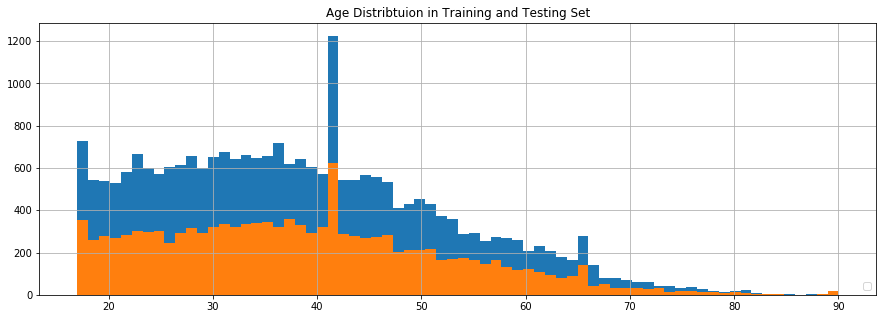

In [114]:
fig = plt.figure(figsize=(15,5))
a = trainDF['Age'].astype(int).hist(bins=70)
b = testDF['Age'].astype(int).hist(bins=70)
plt.title('Age Distribtuion in Training and Testing Set')

Text(0.5,1,'Income Distribution Based on Age')

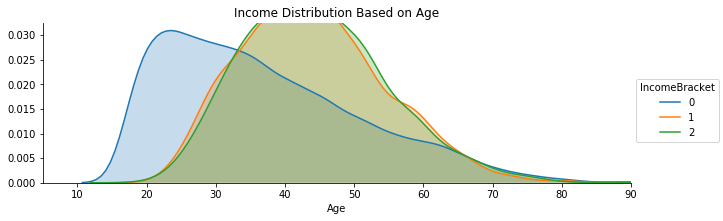

In [150]:
#plot the relationship between age and income 
facet = sns.FacetGrid(trainDF, hue='IncomeBracket', aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(5, trainDF['Age'].max()))
facet.add_legend()
plt.title('Income Distribution Based on Age')

Text(0.5,1,'Income Distribution Based on Education Level')

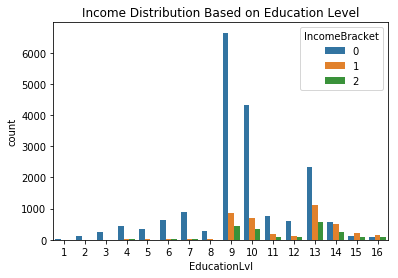

In [149]:
#plot the relationship between education level and income 
sns.countplot(x='EducationLvl', hue='IncomeBracket', data=trainDF)
plt.title('Income Distribution Based on Education Level')

Text(0.5,1,'Income Distribution Based on Racel')

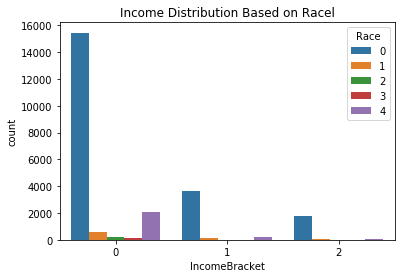

In [151]:
#plot the relationship between race and income 
sns.countplot(x='IncomeBracket', hue='Race', data=trainDF)
plt.title('Income Distribution Based on Race')

In [68]:
trainDF['Age_Grouped']=0
trainDF.loc[trainDF['Age']<=30,'Age_Grouped']=0
trainDF.loc[(trainDF['Age']>30)&(trainDF['Age']<=55),'Age_Grouped']=1
trainDF.loc[trainDF['Age']>55,'Age_Grouped']=2
trainDF.head(2)

,IncomeBracket,Age,WorkClass,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Age_Grouped
0,0,42,1,10,0,9,0,0,0,0,0,40,2,1
1,0,28,0,10,1,2,1,0,1,0,0,30,2,0


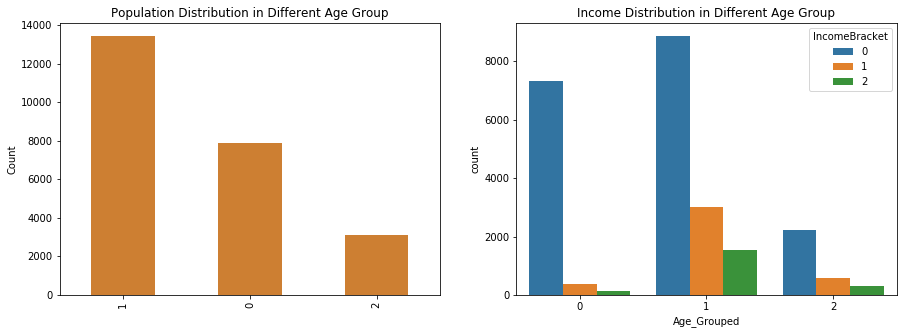

In [119]:
f,ax=plt.subplots(1,2,figsize=(15,5))
trainDF['Age_Grouped'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Population Distribution in Different Age Group')
ax[0].set_ylabel('Count')
sns.countplot('Age_Grouped',hue='IncomeBracket',data=trainDF,ax=ax[1])
ax[1].set_title('Income Distribution in Different Age Group')
plt.show()

In [70]:
trainDF.groupby(['Sex','IncomeBracket'])['IncomeBracket'].count()

Sex  IncomeBracket
0    0                11255
     1                 3413
     2                 1689
1    0                 7178
     1                  581
     2                  305
Name: IncomeBracket, dtype: int64

### b)

#### Correlation between features

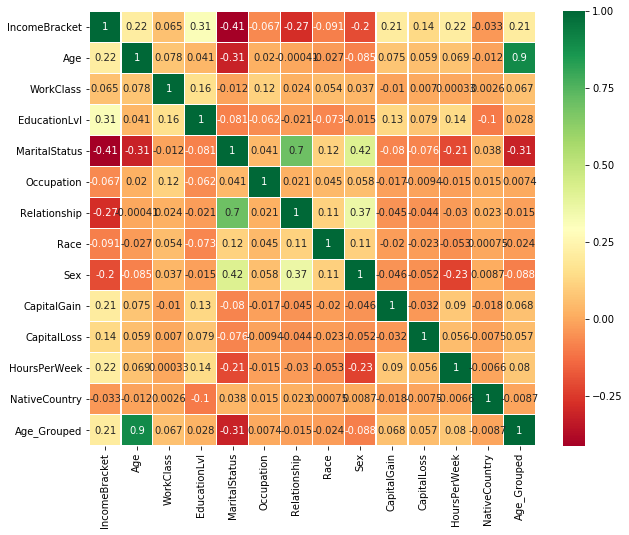

In [71]:
sns.heatmap(trainDF.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [72]:
trainDF.head()

,IncomeBracket,Age,WorkClass,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Age_Grouped
0,0,42,1,10,0,9,0,0,0,0,0,40,2,1
1,0,28,0,10,1,2,1,0,1,0,0,30,2,0
2,1,24,0,10,0,10,0,0,0,0,0,40,2,0
3,0,32,0,5,0,1,0,0,0,0,0,32,2,1
4,0,55,0,14,0,3,0,0,0,2228,0,50,2,1


#### convert netcapital

In [73]:
trainDF['NetCapital']=0
trainDF['NetCapital']=trainDF['CapitalGain']-trainDF['CapitalLoss']
trainDF['PostiveCapital']=0
trainDF.loc[trainDF['NetCapital'] > 0, 'PostiveCapital'] = 1

#### feature importance

In [74]:
X = trainDF[trainDF.columns[1:]]
Y = trainDF['IncomeBracket']

Text(0.5,1,'Feature Importance in Random Forests')

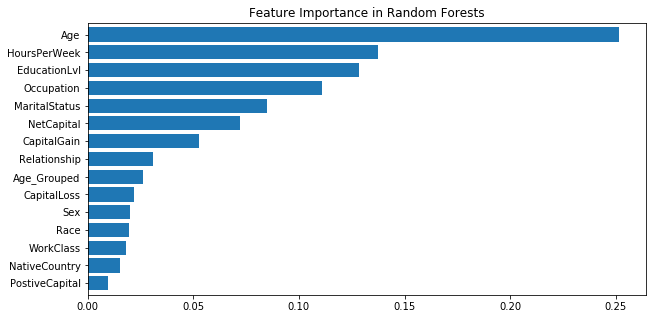

In [75]:
f,ax=plt.subplots(1,1,figsize=(10,5))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax)
ax.set_title('Feature Importance in Random Forests')

Text(0.5,1,'Feature Importance in Gradient Boosting')

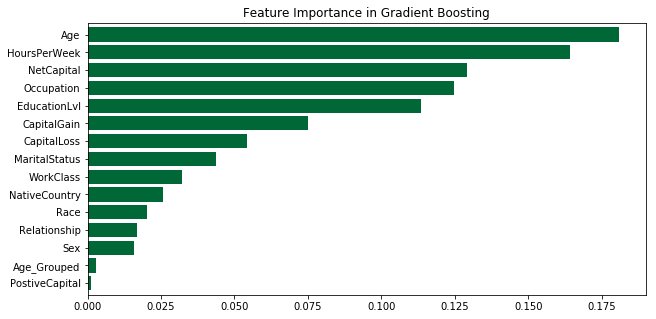

In [76]:
f,ax=plt.subplots(1,1,figsize=(10,5))
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax,cmap='RdYlGn_r')
ax.set_title('Feature Importance in Gradient Boosting')

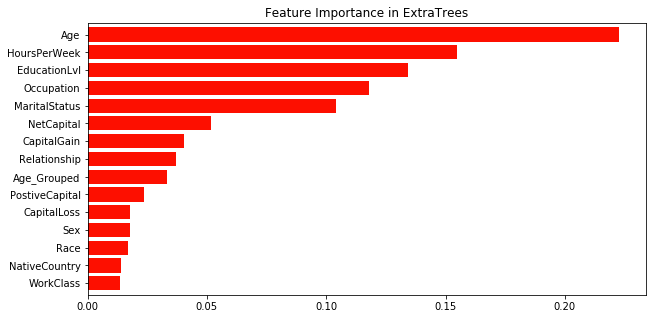

In [77]:
# Feature Importance
f,ax=plt.subplots(1,1,figsize=(10,5))
model = ExtraTreesClassifier()
model.fit(X, Y)
# display the relative importance of each attribute
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax,color='#FD0F00')
ax.set_title('Feature Importance in ExtraTrees')
plt.show()

Throughout Random Forests, Gradient Boosting and Extra Trees, the top 2 most important features are age, hours/week. While the third most important feature are different using different method. Random Forest and Extra Trees considered education level,but Gradient Boosting take net capital as important factor.

# 4. Model Implementation

In [78]:
# convert WorkClass
testDF['WorkClass'].replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 
                               'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'],[0,0,0,1,1,1,2,2],inplace=True)
                              
# convert MaritalStatus
testDF['MaritalStatus'].replace(['Married-civ-spouse', 'Divorced',  'Never-married', 
'Separated', 'Widowed', 'Married-spouse-absent','Married-AF-spouse'],[0,1,1,1,1,0,0],inplace=True)

# convert Occupation      
testDF['Occupation'].replace(['Tech-support','Craft-repair','Other-service','Sales','Exec-managerial',
                               'Prof-specialty','Handlers-cleaners','Machine-op-inspct','Adm-clerical','Farming-fishing',
                               'Transport-moving','Priv-house-serv','Protective-serv','Armed-Forces'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13],inplace=True)
                              
 # convert Relationship
testDF['Relationship'].replace(['Wife','Own-child','Husband','Not-in-family','Other-relative', 'Unmarried'],[0,0,0,1,1,1],inplace=True)
                              
#convert Race
testDF['Race'].replace(['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'],[0,1,2,3,4],inplace=True)
                              
# convert Sex
testDF['Sex'].replace(['Male','Female'],[0,1],inplace=True)
                              
# convert NativeCountry
testDF['NativeCountry'].replace(['United-States','Cambodia','England','Puerto-Rico','Canada',
                                  'Germany','Outlying-US(Guam-USVI-etc)','India','Japan','Greece','South','China',
                                  'Cuba','Iran','Honduras','Philippines','Italy','Poland','Jamaica','Vietnam','Mexico','Portugal',
                                  'Ireland','France','Dominican-Republic','Laos','Ecuador','Taiwan','Haiti','Colombia','Hungary',
                                  'Guatemala','Nicaragua','Scotland','Thailand','Yugoslavia','El-Salvador','Trinadad&Tobago',
                                  'Peru','Hong','Holand-Netherlands','Columbia'],[2,0,1,3,2,1,4,0,0,1,0,0,3,0,3,0,1,1,3,0,2,1,1,1,3,0,3,0,3,3,1,3,3,1,0,1,3,3,3,0,1,3],inplace=True)

# convert IncomeBracket
testDF['IncomeBracket'].replace(['<50K','50-100K','>100K'],[0,1,2],inplace=True)

In [79]:
testDF.drop(['Education','FinalWeight'],axis=1,inplace=True)

In [137]:
droped = trainDF.drop(['NativeCountry', 'Race','Sex'], axis=1)

In [138]:
droped.head()

,IncomeBracket,Age,WorkClass,EducationLvl,MaritalStatus,Occupation,Relationship,CapitalGain,CapitalLoss,HoursPerWeek,Age_Grouped,NetCapital,PostiveCapital
0,0,42,1,10,0,9,0,0,0,40,1,0,0
1,0,28,0,10,1,2,1,0,0,30,0,0,0
2,1,24,0,10,0,10,0,0,0,40,0,0,0
3,0,32,0,5,0,1,0,0,0,32,1,0,0
4,0,55,0,14,0,3,0,2228,0,50,1,2228,1


In [139]:
train,test=train_test_split(droped,test_size=0.3,random_state=0,stratify=trainDF['IncomeBracket'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=trainDF[trainDF.columns[1:]]
Y=trainDF['IncomeBracket']

#### Decision Tree

In [140]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction1,test_Y))

The accuracy of the Decision Tree is 0.746963286475


Decision trees are diagrams that attempt to display the range of possible outcomes and subsequent decisions made after an initial decision. <br/>
Pros: <br./> 1. Computation time is short. <br./> 2. Decision Tree  has less parameters to tune. <br./>
Cons: <br./>1. Decision Trees do not work well if you have smooth boundaries. <br./> 2. Decision Tree's do not work best if have a lot of  un-correlated variables.  

#### K-Nearest Neighbours(KNN)

In [141]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction2,test_Y))

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


The accuracy of the KNN is 0.796233110414


In k-NN classification, the input consists of the k closest training examples in the feature space. the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.<br/>
Pros: <br/> 1. Robust to noisy training data. <br/> 2. Effective if the training data is large.<br/>
Cons:<br/> 1. The outcome varies based on the value of parameter K. <br/> 2. Computation time is long.

#### Logistic Regression

In [142]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the Logistic Regression is 0.798689777535


Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function.
<br/>
Pros: <br/> 1. There is no homogeneity of variance assumption. <br/> 2. Computation time is short.<br/>
Cons:<br/> 1. Easy to overfit the model. <br/> 2. Logistic regression attempts to predict outcomes based on a set of independent variables.

#### Ramdom Forest

In [143]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction4,test_Y))

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


The accuracy of the Random Forests is 0.789136072062


Random Forest is a ensemble learning method for both classification and regression.<br/>
Pros: <br/> 1.The computation time is short. <br/> 2. It has methods for balancing error in class population unbalanced data sets.<br/>
Cons:<br/> 1. Random forests have been observed to overfit for some datasets with noisy classification/regression tasks.

#### 10-fold Cross Validation

In [144]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=42) # k=10, split the data into 10 equal parts
mean=[]
accuracy=[]
std=[]
classifiers=['Decision Tree','KNN', 'Logistic Regression','Random Forest']
models=[DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':mean,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Decision Tree,0.748496,0.007531
KNN,0.792310,0.007497
Logistic Regression,0.796077,0.005838
Random Forest,0.787724,0.007714


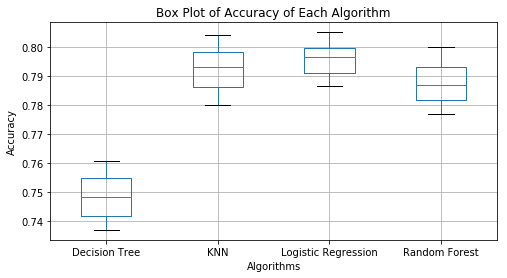

In [145]:
plt.subplots(figsize=(8,4))
plt.title('Box Plot of Accuracy of Each Algorithm')
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

The 10-fold cross validation shows that logistic regression performed best over the four classifiers. It has the highest mean and least standard deviation. As it ploted in the box plot above, the results are comparatively stable.

# 5. Model Tuning

#### Optimize Model: Grid Search

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
model =LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = Y.values[train_idx], Y.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)

            predictions = model.predict(X_test)

            TN = confusion_matrix(y_test, predictions)[0][0]
            FP = confusion_matrix(y_test, predictions)[0][1]
            FN = confusion_matrix(y_test, predictions)[1][0]
            TP = confusion_matrix(y_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


{'C': 5, 'solver': 'newton-cg'}
Best Score: 87.092%(0.32%)

The optimal log model uses C=5, and a newton-cg solver, and has a cross validation score of 87.092% with a standard deviation of 0.32%


I selected hyperparameter C and solver to tune the model. The best model is determined by calculating the accuracy, where is (true positve and true negative)/ total case. Accuracy is one of the most important metrics to evaluate the performance of a model. We want the model to as accurate as possible to classify unlabelled data.

# 6.Testing

#### Training Data

In [89]:
model = LogisticRegression(C=best_params['C'],solver=best_params['solver'])
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Michael\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Michael\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


The accuracy of the Logistic Regression is 0.798962740549


C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


#### Testing Data

In [90]:
testDF['Age_Grouped']=0
testDF.loc[testDF['Age']<=30,'Age_Grouped']=0
testDF.loc[(testDF['Age']>30)&(testDF['Age']<=55),'Age_Grouped']=1
testDF.loc[testDF['Age']>55,'Age_Grouped']=2
testDF.head(2)

,IncomeBracket,Age,WorkClass,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Age_Grouped
0,1,57,0,10,0,3,0,0,1,0,0,25,2,2
1,0,35,0,13,1,2,1,0,0,0,0,50,2,1


In [91]:
testDF['NetCapital']=0
testDF['NetCapital']=testDF['CapitalGain']-testDF['CapitalLoss']
testDF['PostiveCapital']=0
testDF.loc[testDF['NetCapital'] > 0, 'PostiveCapital'] = 1

In [92]:
model = LogisticRegression(C=best_params['C'],solver=best_params['solver'])
model.fit(train_X,train_Y)
test_X = testDF[testDF.columns[1:]]
test_Y = testDF[testDF.columns[:1]]
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Michael\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Michael\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


The accuracy of the Logistic Regression is 0.788878879699


C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Comparing to training set, the accuracy of test set is slightly lower. Because the model is built based on the training data. 